<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/MarketMixModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [58]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#reading the data 
data_frame=pd.read_csv("./drive/My Drive/ConsumerElectronics.csv")
media_data=pd.read_excel("./drive/My Drive/Media data and other information.xlsx",sheet_name='Media Investment')

In [12]:
df=data_frame.copy()

In [13]:
#printing some rows of data
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [14]:
#checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [15]:
#We should change the order_date data type for future use
df["order_date"]=pd.to_datetime(df["order_date"], errors='coerce')

In [16]:
#while changing the gmv column to numeric we can find we have some data where gmv is " "
df[df["gmv"]==" "].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4.418158e+15,4.418158e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5


In [17]:
df["gmv"].replace(" ",0,inplace=True)

In [18]:
#we need to change the data type of gmv(Gross Merchandise Value or Revenue) to int as this is of int type
df["gmv"]=pd.to_numeric(df["gmv"])

In [19]:
#checking shape of data
df.shape

(1648824, 20)

In [20]:
#checking for null values in dataset
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [21]:
df=df[(df["order_date"]>="2015-07-01") & (df["order_date"]<"2016-07-01")]

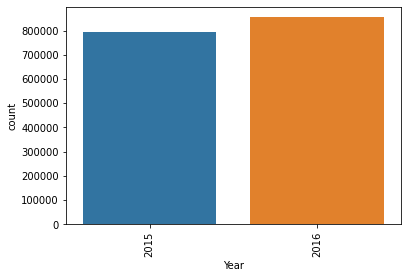

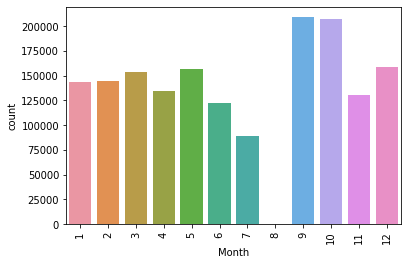

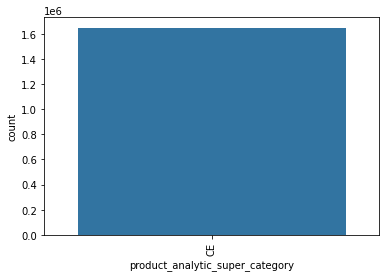

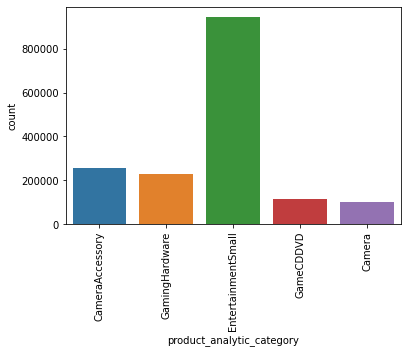

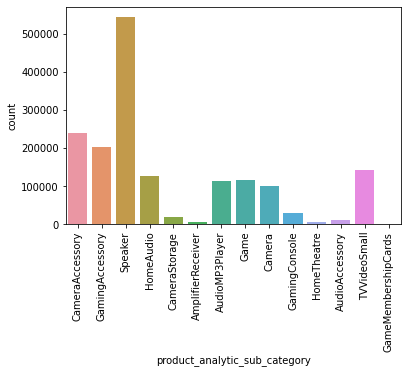

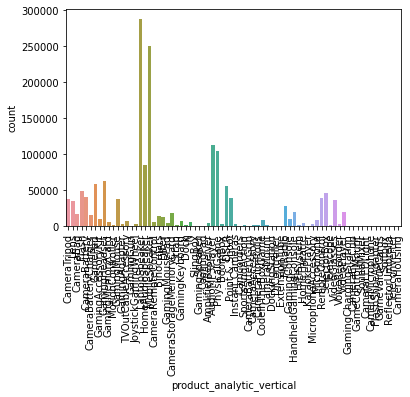

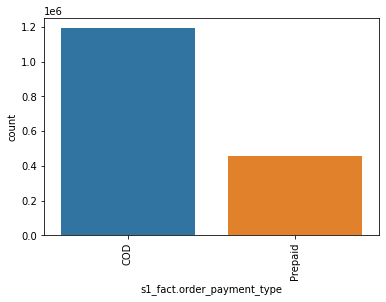

In [22]:
arr=["Year","Month","product_analytic_super_category","product_analytic_category","product_analytic_sub_category","product_analytic_vertical","s1_fact.order_payment_type"]
for i in arr:
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

In [23]:
#As we can see we have only 2 types of payment i am converting them into 0 and 1 that may be helpful in future calculation
df["s1_fact.order_payment_type"].replace("COD",1,inplace=True)
df["s1_fact.order_payment_type"].replace("Prepaid",0,inplace=True)

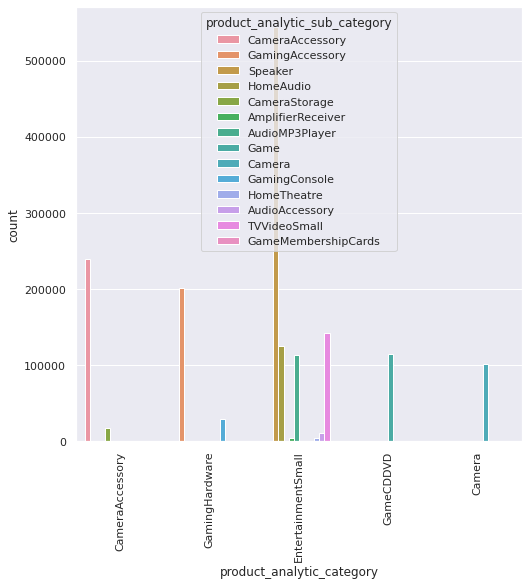

In [24]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_category",hue="product_analytic_sub_category",data=df)
plt.xticks(rotation=90)
plt.show()

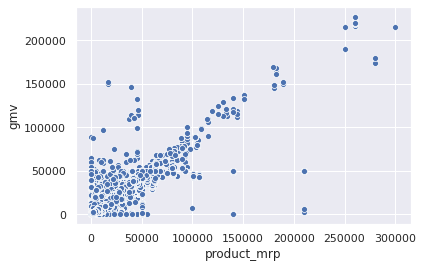

In [25]:
sns.scatterplot(x="product_mrp",y="gmv",data=df)

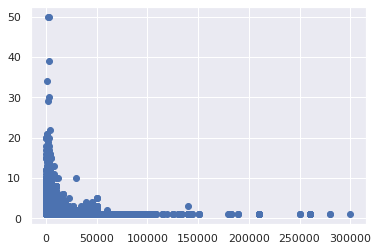

In [26]:
plt.scatter(df["product_mrp"],df["units"])

In [27]:
#sns.pairplot(df)

In [28]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_mrp,product_procurement_sla
count,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06
mean,2.015518e+03,6.585501e+00,2.842324e+15,1.376019e+16,2.453656e+03,1.022088e+00,7.225750e-01,5.687996e+00,4.108187e+03,5.402785e+00
std,4.996622e-01,3.624011e+00,1.269160e+15,5.595594e+16,5.611181e+03,2.535490e-01,4.477281e-01,2.983321e+00,8.510337e+03,5.345918e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602512e+15,1.606665e+15,3.390000e+02,1.000000e+00,0.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611775e+15,2.619112e+15,7.490000e+02,1.000000e+00,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610554e+15,4.397703e+15,1.999000e+03,1.000000e+00,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.000000e+00,1.006000e+03,2.999990e+05,1.000000e+03


## Some Checks on Data like mrp should be greater than 0.

In [29]:
#removing rows having price < 0 as we can see in the description the minimum value of price is 0. And this is not correct
df=df[df["product_mrp"]>0]

In [30]:
#gmv(Gross Merchandise Value or Revenue) should be greater than product_mrp * units. So, removing the data which does not satisfy the criteria
df=df[df["gmv"]<df["product_mrp"]*df["units"]]

In [31]:
#printing the shape of data after removing unwanted data
df.shape

(1583842, 20)

In [32]:
#printing the shape of original data 
data_frame.shape

(1648824, 20)

In [33]:
# printing %ge of data loss
round(100*((data_frame.shape[0]-df.shape[0])/data_frame.shape[0]),2)

3.94

So we are loosing only 4 percent of data . And it will not impact our analysis.

### Dividing the data on the basis of product subcategories.

In [34]:
df["product_analytic_sub_category"].value_counts()

Speaker                533134
CameraAccessory        229488
GamingAccessory        196023
TVVideoSmall           140852
HomeAudio              118542
AudioMP3Player         111349
Camera                  99576
Game                    91021
GamingConsole           27605
CameraStorage           17695
AudioAccessory          10302
HomeTheatre              4141
AmplifierReceiver        4017
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [35]:
df_homeaudio=df[df["product_analytic_sub_category"] == "HomeAudio"].copy()

In [36]:
df_CameraAccessory=df[df["product_analytic_sub_category"] == "CameraAccessory"].copy()

In [37]:
df_GamingAccessory=df[df["product_analytic_sub_category"] == "GamingAccessory"].copy()

In [38]:
#printing some data from each of the data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [39]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [40]:
df_GamingAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075.0,1,\N,\N,1,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750.0,1,\N,\N,1,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899.0,1,\N,\N,0,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,\N,\N,0,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772.0,1,\N,\N,0,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


In [41]:
#printing the shape of all the three data frame
print(df_CameraAccessory.shape)
print(df_GamingAccessory.shape)
print(df_homeaudio.shape)

(229488, 20)
(196023, 20)
(118542, 20)


In [42]:
#Adding Week column in the each data frame
df_CameraAccessory['order_week'] = df_CameraAccessory['order_date'].dt.week
df_CameraAccessory.loc[(df_CameraAccessory.Year == 2016) & (df_CameraAccessory['order_date'].dt.week !=53), 'order_week'] = 53+df_CameraAccessory['order_date'].dt.week
df_GamingAccessory[ 'order_week'] = df_GamingAccessory['order_date'].dt.week
df_GamingAccessory.loc[(df_GamingAccessory.Year == 2016) & (df_GamingAccessory['order_date'].dt.week !=53),'order_week'] = 53+df_GamingAccessory['order_date'].dt.week
df_homeaudio.loc['order_week'] = df_homeaudio['order_date'].dt.week
df_homeaudio.loc[(df_homeaudio.Year == 2016) & (df_homeaudio['order_date'].dt.week !=53),'order_week'] = 53+df_homeaudio['order_date'].dt.week

In [43]:
#Printing some rows of modified data frame
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


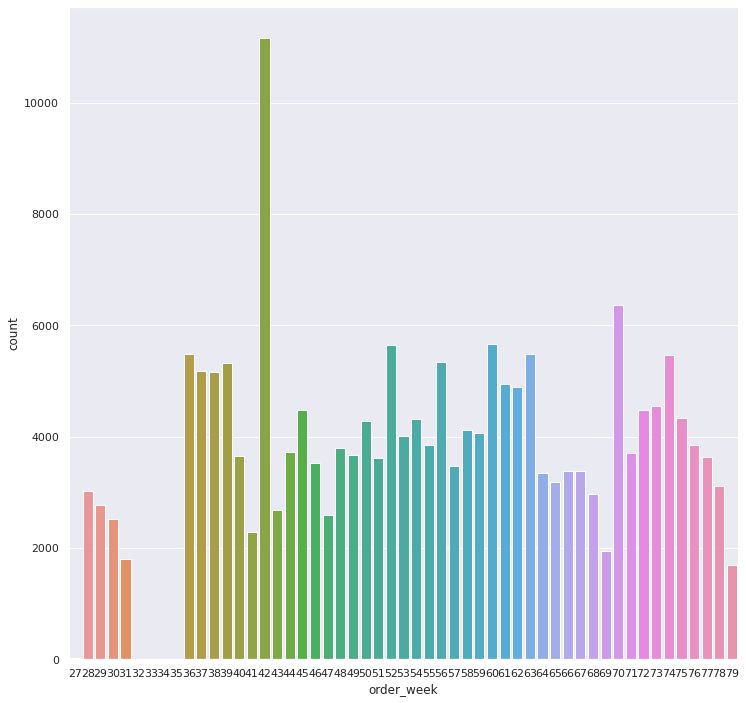

In [44]:
plt.figure(figsize=(12,12))
sns.countplot(x="order_week",data=df_GamingAccessory)
plt.show()

Adding Discount column in all the data frame 

In [45]:
df_CameraAccessory['Discount'] = (df_CameraAccessory['product_mrp']-df_CameraAccessory['gmv'])/df_CameraAccessory['units']

In [46]:
df_GamingAccessory['Discount'] = (df_GamingAccessory['product_mrp']-df_GamingAccessory['gmv'])/df_GamingAccessory['units']
df_homeaudio['Discount'] = (df_homeaudio['product_mrp']-df_homeaudio['gmv'])/df_homeaudio['units']

In [47]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week,Discount
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,790.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,290.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,109.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,409.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,481.0


In [48]:
CameraAccessory=round(df_CameraAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [49]:
#printing some rows of the gropped data frame 
CameraAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0
28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0
29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0
30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0
31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0


In [50]:
GamingAccessory=round(df_GamingAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [51]:
GamingAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0
28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0
29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0
30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0
31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0


In [52]:
homeaudio=round(df_homeaudio.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [53]:
homeaudio.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
54.0,2016.0,1.0,2158.0,1.0,5.0,4526.0,2368.0
55.0,2016.0,1.0,2240.0,1.0,5.0,4230.0,1991.0
56.0,2016.0,1.0,2173.0,1.0,5.0,4111.0,1941.0
57.0,2016.0,1.0,2188.0,1.0,6.0,3986.0,1799.0
58.0,2016.0,2.0,2172.0,1.0,5.0,4320.0,2148.0


In [72]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233


In [73]:
camedia=media_data.merge(CameraAccessory,how="inner",on=["Year","Month"])

In [74]:
camedia.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,gmv,units,sla,product_mrp,Discount
0,2015,7,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,674.0,1.0,2.0,1512.0,838.0
1,2015,7,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,1372.0,1.0,7.0,2488.0,1105.0
2,2015,7,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,1488.0,1.0,6.0,2567.0,1079.0
3,2015,7,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,1454.0,1.0,6.0,2571.0,1121.0
4,2015,7,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,1464.0,1.0,6.0,2498.0,1034.0
